In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

Couldn't fit curve to recovery.
{'v_half_act': -25.372778267087956, 'gv_slope': 5.979533060983208, 'v_half_ssi': -54.77535847253028, 'ssi_slope': 7.039069712260356, 'tau_fast': 0.001, 'tau_slow': 0.001, 'percent_fast': 1000}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min       	max    
1  	100   	12407.3	14335.8	0.137011  	29273  
2  	100   	13229  	14502.5	0.137011  	29274.9
3  	100   	6643.44	12183.5	0.137011  	29270.2
4  	100   	6980.57	12671.6	0.137011  	49537.9
5  	100   	7464.34	12756.4	0.0573383 	29270  
6  	100   	7903.28	12993.4	0.0573383 	29270.3
7  	100   	6293.5 	12023.6	0.0573383 	29270.3
8  	100   	7464.09	12756.4	0.0365988 	29268.5
9  	100   	4829.88	10863.4	0.0365988 	29268.6
10 	100   	5854.16	11707  	0.0186985 	29269.8
11 	100   	5561.47	11481.7	0.0186985 	29270.9
12 	100   	5122.46	11120.7	0.0186985 	29269.8
13 	100   	5854.2 	11706.9	0.0334129 	29268.7
14 	100   	3951.72	10001.4	0.0334129 	29269.1
15 	100   	4098.13	10155.4	0.0334129 	29268.4
16 	100   	3220.03	9157.46	0.00806529	29268.2
17 	100   	5122.36	11120.7	0.0118129 	29269.7
18 	100   	3219.9 	9157.5 	0.0262636 	29268.1
19 	100   	3951.69	10001.4	0.0169365 	29270  
20 	100   	4683.31	10729.6	0.0111426 	29268.4
21 	100   	2781   	8581.63	0.00368

In [6]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [122.3364683140271, 0.03660634562206451, 0.0429884071304112, 0.10617167899580122, 86.05784898306653, 0.035670727916973524, 1.0612223432626449, 0.17631684276247953, 191.73615218197526, 0.013758727936283743, 1.9975771225784518, 0.008675988986759512, 0.7262473211504464, 0.18522841408055613, 0.0800534647350542, 1.8312785465399224, 799.7442927596047, 0.07615471481297789, 11.96763546956423, -14.128882550900697, 4820.376277528697, 1.7248894703847415, 2.7068012781196584]
[inact_err, act_err]: (0.00014144385878545, 0.0011887858542938383, 0.002092882589218537, 0.00025816107419952133)


1
2
3
4


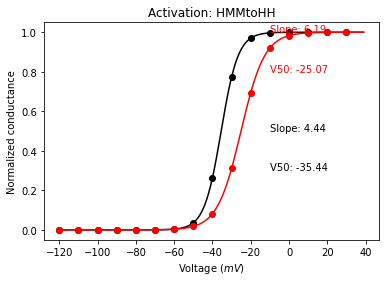

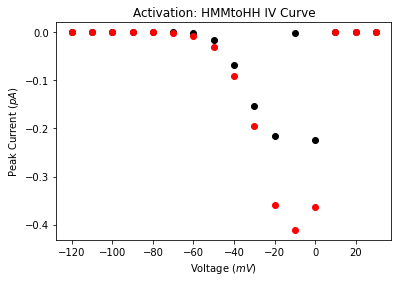

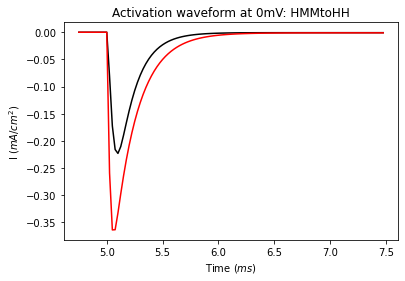

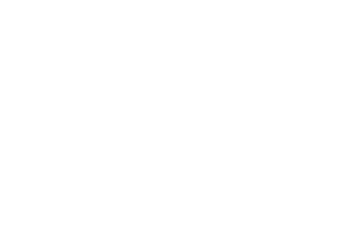

In [7]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name)

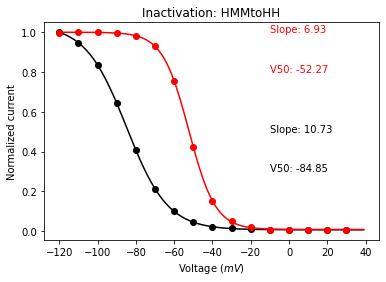

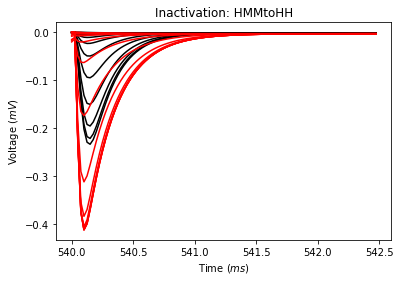

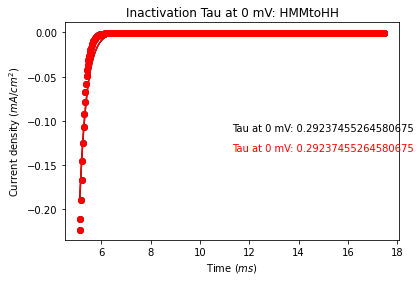

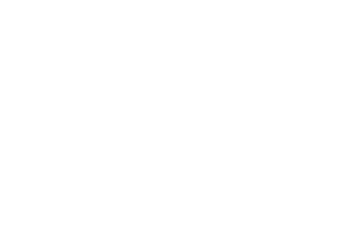

In [8]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name)

In [9]:
wt_act = ggsdHMM.Activation(channel_name = channel_name)


In [ ]:
#plotter.set_param(p, True,sim_obj = wt_act)
wt_act.genActivation()
act_v_half_wt, act_slope_wt = wt_act.plotActivation_VGnorm_plt(plt, 'black')
wt_act.plotActivation_TCurrDensityRelation(xlim = [4.9,7])

In [ ]:
%matplotlib inline
import curve_fitting as cf

In [ ]:
color = 'black'
diff = 0
plt.plot(wt_act.v_vec, wt_act.gnorm_vec, 'o', c=color)
gv_slope, v_half, top, bottom = cf.calc_act_obj(wt_act)

#gv_slope, v_half, top, bottom = cf.calc_act_obj(self.channel_name, True)
formatted_gv_slope = np.round(gv_slope, decimals=2)
formatted_v_half = np.round(v_half, decimals=2)
plt.text(-10, 0.5 + diff, f'Slope: {formatted_gv_slope}', c = color)
plt.text(-10, 0.3 + diff, f'V50: {formatted_v_half}', c = color)
x_values_v = np.arange(wt_act.st_cl, wt_act.end_cl, 1)
curve = cf.boltzmann(x_values_v, gv_slope, v_half, top, bottom)
plt.plot(x_values_v, curve, c=color)

In [ ]:
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(wt_act)
print(gv_slope,v_half_act,top,bottom)


In [ ]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)

In [ ]:
act_obj = ggsdHMM.Activation(channel_name='na16')

In [ ]:
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [ ]:
 act_obj = ggsdHMM.Activation(channel_name='na16')
inact_obj = ggsdHMM.Inactivation(channel_name='na16')
recov_obj = ggsdHMM.RFI(channel_name='na16')
#gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
#ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)

In [ ]:

plt.xlabel('Time $(ms)$')
plt.ylabel('Current density $(mA/cm^2)$')

wt_inact = ggsdHMM.Inactivation(channel_name = channel_name)
wt_inact.genInactivation()
wt_tau = wt_inact.plotInactivation_Tau_0mV_plt(plt, 'black')
wt_per_cur = find_persistent_current(is_HMM)



In [ ]:
from scipy import optimize
diff = 0
color = 'black'
upper = 700
def fit_expon(x, a, b, c):
    return a + b * np.exp(-1 * c * x)

def one_phase(x, y0, plateau, k):
            return y0 + (plateau - y0) * (1 - np.exp(-k * x))

act = ggsdHMM.Activation(channel_name = channel_name)
act.clamp_at_volt(0)
starting_index = list(act.i_vec).index(act.find_ipeaks_with_index()[1])

t_vecc = act.t_vec[starting_index:upper]
i_vecc = act.i_vec[starting_index:upper]
#print(t_vecc)
#print(i_vecc)
try:
    popt, pcov = optimize.curve_fit(fit_expon,t_vecc,i_vecc, method = 'dogbox')
    fit = 'exp'
    tau = 1/popt[2]
    fitted_i = fit_expon(act.t_vec[starting_index:upper],popt[0],popt[1],popt[2])
except:
    popt, pcov = optimize.curve_fit(one_phase,t_vecc,i_vecc, method = 'dogbox')
    fit = 'one_phase'
    tau = 1/popt[2]
    fitted_i = one_phase(act.t_vec[starting_index:upper],popt[0],popt[1],popt[2])
    
xmid = (max(t_vecc) + min(t_vecc))/2
ymid = (max(i_vecc) + min(i_vecc))/2
if color == 'red':
    diff = ymid*0.2
#
plt.plot(act.t_vec[starting_index:upper], fitted_i, c=color)
plt.plot(t_vecc,i_vecc,'o',c=color)
plt.text(xmid, ymid + diff, f"Tau at 0 mV: {tau}", color=color)
